In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_5fps = pd.read_csv("../measurements/jpeg/5_fps/map.csv")
df_10fps = pd.read_csv("../measurements/jpeg/10_fps/map.csv")
df_15fps = pd.read_csv("../measurements/jpeg/15_fps/map.csv")
df_30fps = pd.read_csv("../measurements/jpeg/30_fps/map.csv")

In [3]:
df_5fps.head()

,pruning_thresh,jepg_quality,data_size_mean,data_size_std,map
0,0.02,60,6923.970588,2623.315342,0.447372
1,0.02,70,8401.441176,3034.912919,0.507925
2,0.02,80,10902.529412,3692.514616,0.521720
3,0.02,90,16618.676471,4269.853708,0.553546
4,0.02,100,41442.058824,6908.251707,0.557336


In [4]:
no_split_map = 0.524

Text(0.5, 0, 'Transferred data size [KB]')

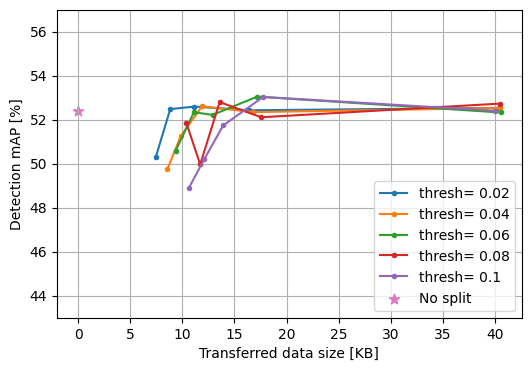

In [5]:
plt.figure(figsize=(6,4))
df_group = df_30fps.groupby("pruning_thresh")
for key in df_group.groups.keys():
    dfg = df_group.get_group(key)
    plt.plot(dfg["data_size_mean"].to_numpy()/1000,dfg["map"].to_numpy()*100, marker="." ,label="thresh= "+str(key))
plt.scatter(0,no_split_map*100,60,marker="*",color="tab:pink",label="No split")
plt.legend()
plt.grid()
plt.ylim([43,57])
plt.ylabel("Detection mAP [%]")
plt.xlabel("Transferred data size [KB]")
# plt.autoscale(axis="x",tight=True)

Text(0.5, 0, 'Transferred data size [KB]')

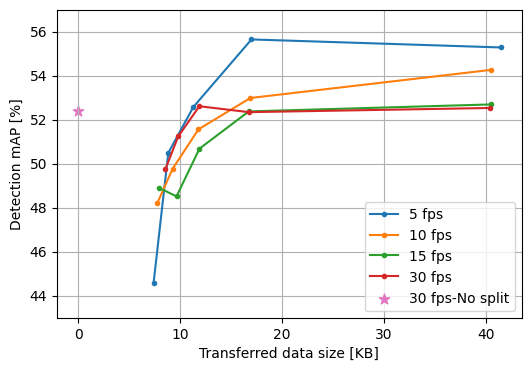

In [6]:
plt.figure(figsize=(6,4))
df_group_5 = df_5fps.groupby("pruning_thresh")
df_group_10 = df_10fps.groupby("pruning_thresh")
df_group_15 = df_15fps.groupby("pruning_thresh")
df_group_30 = df_30fps.groupby("pruning_thresh")

key =0.04
dfg_5 = df_group_5.get_group(key)
dfg_10 = df_group_10.get_group(key)
dfg_15 = df_group_15.get_group(key)
dfg_30 = df_group_30.get_group(key)

plt.plot(dfg_5["data_size_mean"].to_numpy()/1000, dfg_5["map"].to_numpy()*100,marker="." , label="5 fps")
plt.plot(dfg_10["data_size_mean"].to_numpy()/1000, dfg_10["map"].to_numpy()*100, marker="." ,label="10 fps")
plt.plot(dfg_15["data_size_mean"].to_numpy()/1000, dfg_15["map"].to_numpy()*100, marker="." ,label="15 fps")
plt.plot(dfg_30["data_size_mean"].to_numpy()/1000, dfg_30["map"].to_numpy()*100, marker="." ,label="30 fps")
plt.scatter(0,no_split_map*100,60,marker="*",color="tab:pink",label="30 fps-No split")
plt.legend()
plt.ylim([43,57])
plt.grid()
plt.ylabel("Detection mAP [%]")
plt.xlabel("Transferred data size [KB]")
# plt.autoscale(axis="x",tight=True)